In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
data = pd.read_csv("c:\\Users\\hp\\Desktop\\student_scores - student_scores.csv")
#pandas is reading the data from csv file
print(data)


    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [14]:
# we will predict the score
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [15]:
# it represent the statical representation 
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [16]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


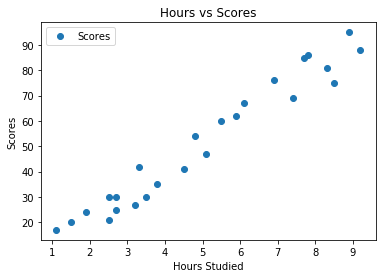

In [17]:
# Now lets see the relationship between these columns
data.plot(x='Hours', y='Scores',style="o")
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

(array([3., 4., 3., 1., 3., 2., 1., 2., 3., 3.]),
 array([1.1 , 1.91, 2.72, 3.53, 4.34, 5.15, 5.96, 6.77, 7.58, 8.39, 9.2 ]),
 <a list of 10 Patch objects>)

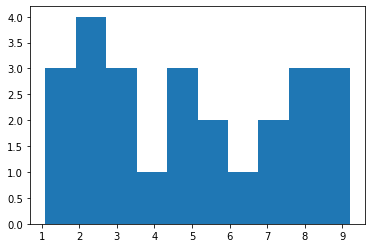

In [18]:
# histogram data representation
plt.hist(data["Hours"])

(array([4., 5., 1., 3., 1., 2., 2., 2., 3., 2.]),
 array([17. , 24.8, 32.6, 40.4, 48.2, 56. , 63.8, 71.6, 79.4, 87.2, 95. ]),
 <a list of 10 Patch objects>)

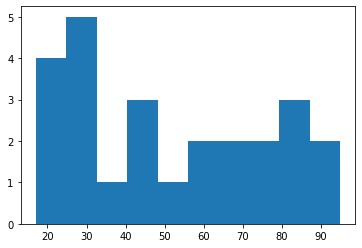

In [19]:
plt.hist(data["Scores"])

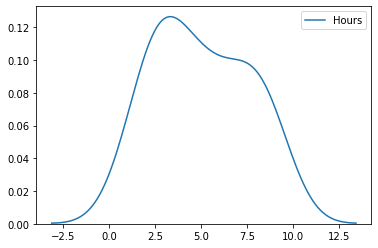

In [20]:
#for data Visulaization
import seaborn as sns
sns.kdeplot(data["Hours"])

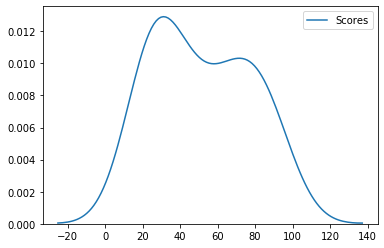

In [21]:
sns.kdeplot(data["Scores"])

In [22]:
# Now divide the data into "attributes" (inputs) and "labels" (outputs).
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values
print(X,y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]] [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [23]:
X.shape

(25, 1)

In [24]:
y.shape

(25,)

In [25]:
X.reshape(25,1)
X.shape

(25, 1)

In [26]:
# Now split our data into train and test set. Here our model will train its parameters by train set and then predict on test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [27]:
#now crearting linear regresssion model and train our model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

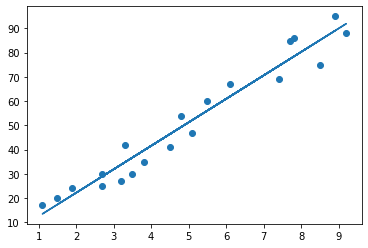

In [28]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X_train, y_train)
plt.plot(X, line);
plt.show()

In [29]:
#predicted Values
y_pred = model.predict(X_test)
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [30]:
mean_squared_error(y_test,y_pred)


18.943211722315272

In [31]:
r2_score(y_test,y_pred)

0.9678055545167994

In [32]:
mean_absolute_error(y_test, y_pred)

3.9207511902099244

In [33]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.352380006653288

In [34]:
# lets see the actual y_test and predicted values of the model(y_pred)
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data


,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [35]:
#  Now predict for 9.25 hours
new_data = np.array([9.25]).reshape(1,1)
new_data.shape

(1, 1)

In [36]:
# Predicted Score
own_pred = model.predict(new_data)
print("No of Hours = {}".format(new_data[0]))
print("Predicted Score = {}".format(own_pred))

No of Hours = [9.25]
Predicted Score = [92.38611528]


In [37]:
X_line = X
y_line = model.coef_ * X+ model.intercept_

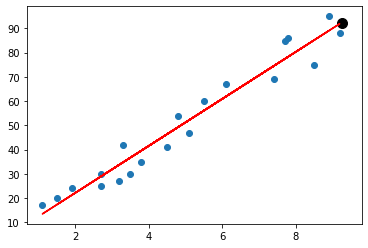

In [38]:
# Scatter Plot
plt.scatter(X_train, y_train)
plt.scatter(new_data.reshape(1), own_pred, c='black', s=100)
plt.plot(X_line, y_line, c='r')
plt.show()

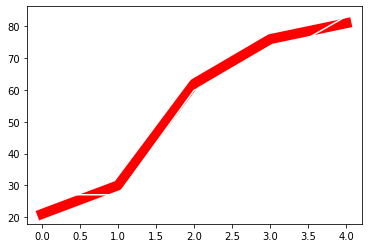

In [39]:
plt.plot(sorted(y_test),c='r',linewidth = 10)
plt.plot(sorted(y_pred),c='w')
plt.show()

In [40]:
# Print ALL 
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_pred, y_test)
print('mean_squared_error:', mse)
print('mean_absolute_error:', mae)
print('r2_score:', r2)

mean_squared_error: 18.943211722315272
mean_absolute_error: 3.9207511902099244
r2_score: 0.9633493914970949


In [ ]:
thanks you